# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [19]:
def F(n):
    for ln in range(1, n+1):
        str = '-' * (n-ln)
        start = 65 + ln - 1
        for i in range(start, 65, -1):
            str += chr(i)
        for i in range(65, start+1):
            str += chr(i)
        str += '-' * (n-ln)
        print(str)
# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [35]:
def F(d : dict):
    sorted_keys = sorted(d.keys())
    print("sorted by key")
    for i in range(len(sorted_keys)):
        a, b = d[sorted_keys[i]]
        print(str(sorted_keys[i]) + ',' + str(a) +',' + str(b))

    print("Sorted by x")
    sorted_by_x = sorted(d.items(), key=lambda item : item[1][0], reverse=True)
    for i in range(len(sorted_by_x)):
        (key, (a, b)) = sorted_by_x[i]
        print(str(key) + ',' + str(a)  + ','+ str(b)) 

    print("sorted by y")
    sorted_by_y = sorted(d.items(), key = lambda item : item[1][1])
    for i in range(len(sorted_by_y)):
        (key, (a, b)) = sorted_by_y[i]
        print(str(key) + ',' + str(a)  + ','+ str(b))

    
        

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

sorted by key
1,1,2
2,-1,4
4,2,3
5,-4,3
Sorted by x
4,2,3
1,1,2
2,-1,4
5,-4,3
sorted by y
1,1,2
5,-4,3
4,2,3
2,-1,4
sorted by key
-8,4,2
5,9,-10
6,-3,4
7,2,1
Sorted by x
5,9,-10
-8,4,2
7,2,1
6,-3,4
sorted by y
5,9,-10
7,2,1
-8,4,2
6,-3,4


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [66]:
#TODO
def open_file(filepath):
    data = {}
    with open(filepath, 'r') as students_records:
        lines = students_records.readlines()
        headers = lines[0].strip().split(',')
        for line_no, line in enumerate(lines[1:]):
            values = line.strip().split(',')
            row = {headers[i] : values[i] for i in range(len(values))}
            data[line_no + 1] = row
    return data

filepath = 'student_records.csv'
data = open_file(filepath)
for i in range(1, 11) :
    print(data[i]) 
    

{'roll_number': '588946', 'department': 'MA', 'credit': '3', 'course_name': 'EC250', 'course_type': 'hasmed_elective', 'grade': 'AB'}
{'roll_number': '145372', 'department': 'EP', 'credit': '4', 'course_name': 'EP407', 'course_type': 'hasmed_elective', 'grade': 'CC'}
{'roll_number': '834515', 'department': 'MA', 'credit': '8', 'course_name': 'EP885', 'course_type': 'hasmed_elective', 'grade': 'BB'}
{'roll_number': '344265', 'department': 'CSE', 'credit': '6', 'course_name': 'CSE699', 'course_type': 'honours', 'grade': 'AB'}
{'roll_number': '358405', 'department': 'MA', 'credit': '3', 'course_name': 'EE460', 'course_type': 'minor', 'grade': 'AP'}
{'roll_number': '781075', 'department': 'CE', 'credit': '8', 'course_name': 'CE540', 'course_type': 'honours', 'grade': 'CC'}
{'roll_number': '180828', 'department': 'CSE', 'credit': '6', 'course_name': 'CE880', 'course_type': 'minor', 'grade': 'AB'}
{'roll_number': '981238', 'department': 'MM', 'credit': '4', 'course_name': 'CSE226', 'course_t

#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [ ]:
#TODO

grades_dict = {'AP' : 10,
               'AA' : 10,
               'AB' : 9,'BB' : 8,
               'BC' : 7,'CC' : 6,
               }

student_data = {}
for i in data.items():
    key, dictionary = i
    if dictionary['roll_number'] in student_data: 
        student_data[dictionary['roll_number']].append(dictionary)
    else : 
        student_data[dictionary['roll_number']] = [dictionary]

student_cpi = {}

for key, vals in student_data.items():
    student_cpi[key] = 0
    grade_sum = 0 
    credit_sum = 0
    for entry in vals:
        course_type = entry['course_type']
        credit = entry['credit']
        grade = entry['grade']
        if course_type != 'minor' or course_type != 'alc' or course_type != 'honours' : 
            credit_sum += int(credit)
            grade_sum += grades_dict[grade] * int(credit)
    if grade_sum != 0 : 
        student_cpi[key] = grade_sum/credit_sum
    else : 
        student_cpi[key] = 0

print(student_cpi)

{'588946': 8.693467336683417, '145372': 7.745664739884393, '834515': 8.21608040201005, '344265': 8.699346405228757, '358405': 8.587378640776699, '781075': 8.170731707317072, '180828': 8.096045197740112, '981238': 8.244047619047619, '836881': 8.386178861788618, '310604': 8.333333333333334, '847809': 8.210727969348659, '773982': 8.068181818181818, '500658': 8.16826923076923, '810863': 8.151041666666666, '124663': 8.126637554585153, '364146': 8.395555555555555, '871746': 8.212962962962964, '270007': 8.033195020746888, '597353': 8.12, '986057': 8.06532663316583, '718510': 8.429347826086957, '836431': 7.9, '379479': 8.246153846153845, '582912': 8.656108597285067, '788020': 8.015544041450777, '613401': 8.440191387559809, '144528': 8.157894736842104, '485484': 8.36111111111111, '680096': 8.045751633986928, '199713': 8.290697674418604, '851029': 8.322981366459627, '845623': 8.375527426160337, '150503': 8.289017341040463, '214270': 7.877729257641922, '517837': 8.580487804878048, '482623': 8.401

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [ ]:
#TODO
course_breakdown_dictionary = {}
for key, vals in student_data.items():
    core_total = 0
    De_total = 0
    Fe_total = 0
    Hasmed_total = 0
    minor_total = 0
    honours_total = 0
    alc_total = 0
    for entry in vals : 
        course_type = entry['course_type']
        credit = entry['credit']
        credit = int(credit)
        if course_type == 'core' : 
            core_total += credit
        elif course_type == 'department_elective':
            De_total += credit
        elif course_type == 'flexible_elective' : 
            Fe_total += credit
        elif course_type == 'hasmed_elective' : 
            Hasmed_total += credit
        elif course_type == 'minor':
            minor_total += credit
        elif course_type == 'honours':
            honours_total += credit
        elif course_type == 'alc':
            alc_total += credit

    course_breakdown_dictionary[key] = {'core_total' : core_total, 'De_total' : De_total, 'Fe_total' : Fe_total, 'Hasmed_total' : Hasmed_total,
                                        'alc_total' : alc_total, 'honours_total' : honours_total, 'minor_total' : minor_total}

print(course_breakdown_dictionary)

pass_outs = {}
for key, dict in course_breakdown_dictionary.items() : 
    if dict['core_total'] >= 20 and dict['De_total'] >= 15 and dict['Fe_total'] >= 10 and dict['Hasmed_total'] >= 5 : 
        pass_outs[key] = 'pass'
    else :
        pass_outs[key] = 'fail'

print(pass_outs)

passers = []

for key, val in pass_outs.items():
    if val == 'pass':
        passers.append(key)

print("Passing bois")
print(passers)




{'588946': {'core_total': 34, 'De_total': 30, 'Fe_total': 25, 'Hasmed_total': 26, 'alc_total': 27, 'honours_total': 20, 'minor_total': 37}, '145372': {'core_total': 20, 'De_total': 31, 'Fe_total': 8, 'Hasmed_total': 39, 'alc_total': 24, 'honours_total': 18, 'minor_total': 33}, '834515': {'core_total': 50, 'De_total': 15, 'Fe_total': 53, 'Hasmed_total': 28, 'alc_total': 6, 'honours_total': 32, 'minor_total': 15}, '344265': {'core_total': 11, 'De_total': 18, 'Fe_total': 20, 'Hasmed_total': 31, 'alc_total': 18, 'honours_total': 27, 'minor_total': 28}, '358405': {'core_total': 15, 'De_total': 12, 'Fe_total': 49, 'Hasmed_total': 44, 'alc_total': 23, 'honours_total': 34, 'minor_total': 29}, '781075': {'core_total': 63, 'De_total': 23, 'Fe_total': 46, 'Hasmed_total': 36, 'alc_total': 26, 'honours_total': 32, 'minor_total': 20}, '180828': {'core_total': 29, 'De_total': 22, 'Fe_total': 40, 'Hasmed_total': 23, 'alc_total': 41, 'honours_total': 7, 'minor_total': 15}, '981238': {'core_total': 64, 

#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [78]:
#TODO
minor = {}
for key, dict in course_breakdown_dictionary.items() : 
    if dict['minor_total'] >= 10 : 
        minor[key] = 'minor_complete'
    else :
        minor[key] = 'minor_not_complete'

minor_complete = []

for key, val in minor.items():
    if val == 'minor_complete':
        minor_complete.append(key)

print("Minor > 10 credits bois")
print(minor_complete)



Minor > 10 credits bois
['588946', '145372', '834515', '344265', '358405', '781075', '180828', '981238', '836881', '847809', '773982', '500658', '810863', '124663', '364146', '871746', '270007', '597353', '986057', '718510', '836431', '379479', '582912', '788020', '613401', '144528', '485484', '680096', '199713', '851029', '845623', '150503', '214270', '517837', '482623', '721490', '955757', '143856', '571782', '973158', '703403', '960395', '521087', '461971', '879634', '716985', '194063', '265922', '283796', '203200', '301135', '327122', '381526', '534763', '391848', '329535', '971123', '207443', '488661', '782129', '581858', '733782', '282482', '572815', '608952', '628849', '630568', '388969', '159438', '478606', '995208', '841365', '970791', '143142', '998293', '907454', '681499', '888886', '608522', '362471', '465496', '208100', '138296', '775967', '692318', '461584', '626000', '458200', '581065', '787967', '381227', '750259', '881983', '294697', '816041', '993835']


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [83]:
#TODO
honours = {}
for key, dict in course_breakdown_dictionary.items() : 
    if dict['honours_total'] >= 10 and dict['core_total'] >= 20 : 
        honours[key] = 'honours_complete'
    else :
        honours[key] = 'honours_not_complete'

# print(honours)

honours_complete = []

for key, val in honours.items():
    if val == 'honours_complete':
        honours_complete.append(key)

print("honours_complete bois")
print(honours_complete)

honours_complete bois
['588946', '145372', '834515', '781075', '836881', '310604', '773982', '500658', '810863', '124663', '364146', '871746', '986057', '718510', '379479', '582912', '788020', '613401', '144528', '485484', '199713', '845623', '150503', '214270', '517837', '482623', '721490', '955757', '589528', '143856', '571782', '973158', '703403', '960395', '521087', '461971', '879634', '716985', '265922', '283796', '203200', '327122', '534763', '391848', '971123', '207443', '488661', '782129', '928288', '581858', '282482', '572815', '608952', '628849', '630568', '388969', '159438', '870642', '970791', '143142', '998293', '681499', '888886', '608522', '362471', '465496', '208100', '692318', '626000', '458200', '581065', '787967', '750259', '881983', '294697']


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [86]:
#TODO
from scipy.optimize import minimize

def f(vars):
    x, y = vars
    return 2 * (x - y - 3)**2 + 4 * (x + 2*y + 1)**4

def c1(vars):
    x, y = vars
    return x - y + 3  


def c2(vars):
    x, y = vars
    return 5 - ((x + 2)**2 + (y + 1)**2) 


cs = [
    {"type": "ineq", "fun": c1},  
    {"type": "ineq", "fun": c2}   
]

start = (0, 0)
result = minimize(f, start, constraints=cs, method='SLSQP')
print(result.x[0], result.x[1])
print("minimize")
print(result.fun)

0.2349250275449747 -0.928514887569978
minimize
7.345026216976594


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [87]:
## so i parametrized the curve and got the final integral to be => 
# from 0 to 2pi, integrate 3cos^2(t) + 9sin^4(t) root(3) dt
# so that is what I formulated with scipy
import numpy as np
from scipy.integrate import quad

def integrand(t):
    return np.sqrt(3) * (3 * np.cos(t)**2 + 9 * np.sin(t)**4)

result, _ = quad(integrand, 0, 2 * np.pi)
print(result)



53.053631403850865


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [166]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [147]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    with open(data_path, 'r') as file : 
        lines = file.readlines()
    data = []
    for line in lines : 
        values = line.strip().split(',')  
        data.append(values)
    data = np.array(data, dtype=float)
    return data 

data = load_data('spice_locations.txt')
print(data.shape)
# print(data)

(60, 2)


In [158]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
import random

def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        values = list(range(len(data)))
        centers = []
        selected = random.sample(values, K)
        for i in range(len(selected)):
            centers.append(data[selected[i]])
    else: centers = init_centers
    return np.array(centers)

random.seed(42) 
K = 5
init_centers = initialise_centers(data, K, init_centers=None)
print(init_centers)



[[ 6.31551713  6.11649063]
 [-3.09087516 -2.08297745]
 [-0.34003029 -0.00670758]
 [ 5.8548359   5.46897798]
 [ 0.82816017  1.04198674]]


In [149]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    labels = [1] * len(data)
    return np.array(labels)

labels = initialise_labels(data)
print(labels.shape)


(60,)


In [154]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances_lists(data, centers):
    distance_matrix = []
    for i in range(len(data)):
        row = []
        for j in range(len(centers)):
            distance_i_j = np.sqrt((data[i][0] - centers[j][0])**2 + (data[i][1] - centers[j][1])**2)
            row.append(distance_i_j)
        distance_matrix.append(row)
    return np.array(distance_matrix)\
    
# earlier has used lists, but then realized that brodcasting is better option here

def calculate_distances(data, centers):
    distance_matrix = np.sqrt(((data[:, np.newaxis, :] - centers[np.newaxis, :, :]) ** 2).sum(axis=2))
    return distance_matrix


distance_matrix = calculate_distances(data, init_centers)
# print(distance_matrix)


In [162]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    for i, row in enumerate(distances):
        closest_center = np.argmin(row)
        labels[i] = closest_center
    return np.array(labels)

new_labels = update_labels(distance_matrix)


In [159]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    new_centres = []
    for label in range(K) : 
        same_label = []
        for i in range(len(labels)):
            if label == labels[i] : 
                same_label.append(i)
        same_label_points = data[same_label]
        new_centres.append(np.mean(same_label_points, axis = 0))
    return np.array(new_centres)

new_centers = update_centers(data, labels, K)
print(new_centers)


[[ 5.96268946  6.50732165]
 [-2.56208032 -1.23910867]
 [-1.68864461  0.59915242]
 [ 4.29128582  5.20872823]
 [ 1.52893289  2.06322886]]


In [161]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [ ]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

# centers, labels, end_time = kmeans('spice_locations.txt', 5, None)


In [168]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')
    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0009989738464355469


<module 'matplotlib.pyplot' from 'c:\\Users\\moond\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

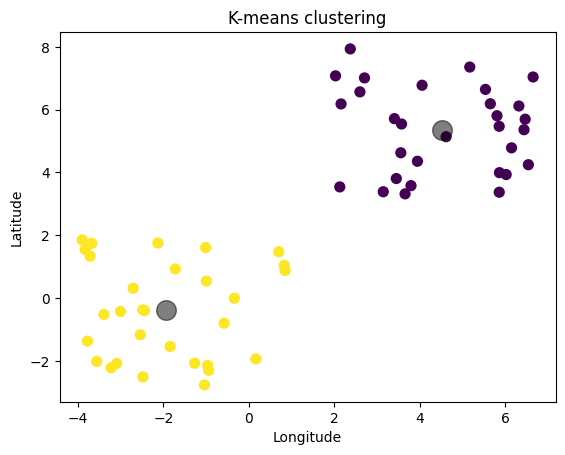

In [169]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)